
## The Affect of Age on Accident Related Motor Vehicle Driver Fatalaties Across The United States

### Introduction

Motor Vehicle ownership in the United States has grown at a tremendous rate in recent years. (see [IBT](https://www.ibtimes.com/has-car-usage-us-peaked-five-charts-worth-browsing-1541012), and see below). 

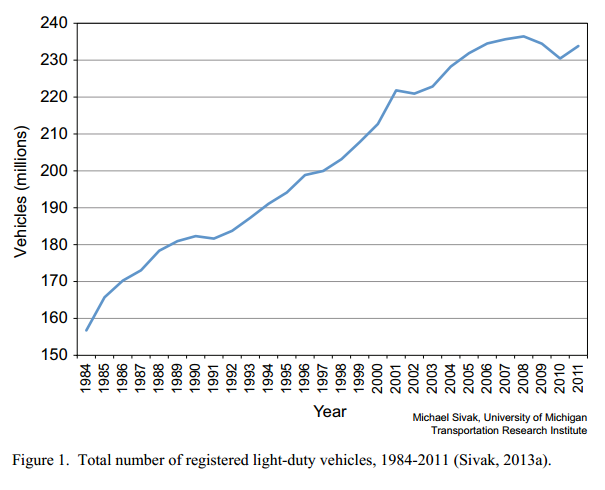

With this increase has seen the rise of motor vehicle fatalities. (see [accidentfirm.com](https://accidentfirm.com/fatal-car-accident-facts) and below)

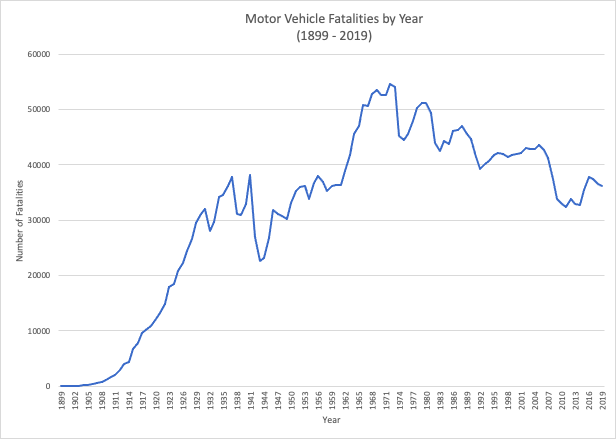

The loss of lives or injuries sustained in a car accident is not just grevious for the family members of the injured but is very costly as well. According to the [Insurance Information Institute](https://www.iii.org/fact-statistic/facts-statistics-highway-safety) In 2020 alone, 4,795,000 people were injured and the cost of deaths, injuries and property damage totaled $474 billion. This is over 2% of the entire GDP of the country. Thus there is a great need to put in place interventions and study factors correlated to motor vehicle accidents as it is beneficial for the country's economy at large. 


According to the [NIH](https://www.nia.nih.gov/health/older-drivers), people of older age tend to drive differently on the roads. This is because of multiple factors including health and behaviour related reasons. 

I wanted to find out if there is any relationship between the age of a driver and the circumstances surrounding a fatal accident such as time of day the accident occured or where the accident occured. 

**Dataset**


The data I use is from the [Fatal Analysis Reporting System (FARS)](https://www.nhtsa.gov/research-data/fatality-analysis-reporting-system-fars) from 2018, which is a record of fatal car accidents recorded by the National Highway Traffic Safety Administration (see [NTHSA](https://www.nhtsa.gov/)). This dataset includes both demographic data, specifically, gender, age and race  and accident related factor data such as manner of collision and many more descriptors. Furthermore, FARS contains data of motor vehicle fatalities across the entire United States with more than 35,000 different observations. 

**Questions**

These are the questions I will be exploring: 

1. Does age affect where a driver in a motor vehicle is involved in a fatal accident?


2. Does age affect the time of day an accident occurs?

**Motivation for first question**

According to [IIHS](https://www.iihs.org/topics/older-drivers), drivers of different ages have varying levels of awereness on a fast moving road. They found that "drivers ages 70 and older, for example, were more likely than drivers ages 35-54 to make inadequate surveillance errors or to misjudge the length of a gap between vehicles or another vehicle's speed."

Given that different road types offer different driving conditions, for example  According to the [US Department of Transportation](https://safety.fhwa.dot.gov/speedmgt/data_facts/docs/rd_func_class_1_42.pdf) principal arterials which connect major cities within a state typically have a maximum speed of between 50 - 70 mph. This means that drivers of different ages need to have a high level of awareness since small mistake can lead to high speed accidents. According to [Pedshed](https://pedshed.net/?p=1050) in relation to deaths caused by motor vehicle accidents, major arterials are the most dangerous road types followed by local streets and followed by collector streets. I intend to expand on this research by exploring motor vehicle fatalities across different age groups on different road types. 


**Motivation for second question**


According to [Nature](https://www.nature.com/articles/srep00278), Presbyopia is a condition that causes eyesight to get worse as one progresses in age. Unfortunately, according to that article, this condition is inevitable no matter how healthy you are. Moreover, according to the [CDC](https://www.cdc.gov/transportationsafety/older_adult_drivers/index.html#:~:text=In%202018%2C%20there%20were%20more,a%2060%25%20increase%20since%202000.&text=Driving%20helps%20older%20adults%20stay%20mobile%20and%20independent.) there are more than 45 million licensed drivers aged 65 and older in the United States. This is interesting since according to the Nature article, Presbyopia starts affecting virtually everbody starting at age 51.This motivates this research question, as to whether age and implicitly eyesight is a determinant factor to the time of day a fatal accident occurs. Important to note, however, is that any result from this does not imply causation as it may be dependent on numerous other factors such as the visibility of the road etc. I hypothesize that there will be a positive correlation observed. In addition, I hypothesize that such a correlation may be stronger for older adults, but will still be there for people of all ages. This is because low visibility because of time of day makes it hard for everyone, regardless of age, to drive safely.


### Import Data and Required Libraries


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
person_raw = pd.read_excel("Person.xlsx")
person_raw.head()


,STATE,STATENAME,ST_CASE,VE_FORMS,VEH_NO,PER_NO,STR_VEH,COUNTY,DAY,DAYNAME,MONTH,MONTHNAME,HOUR,HOURNAME,MINUTE,MINUTENAME,RUR_URB,RUR_URBNAME,FUNC_SYS,FUNC_SYSNAME,HARM_EV,HARM_EVNAME,MAN_COLL,MAN_COLLNAME,SCH_BUS,SCH_BUSNAME,MAKE,MAKENAME,MAK_MOD,MAK_MODNAME,BODY_TYP,BODY_TYPNAME,MOD_YEAR,MOD_YEARNAME,TOW_VEH,TOW_VEHNAME,SPEC_USE,SPEC_USENAME,EMER_USE,EMER_USENAME,...,DRUGS,DRUGSNAME,DRUG_DET,DRUG_DETNAME,DSTATUS,DSTATUSNAME,HOSPITAL,HOSPITALNAME,DOA,DOANAME,DEATH_DA,DEATH_DANAME,DEATH_MO,DEATH_MONAME,DEATH_YR,DEATH_YRNAME,DEATH_HR,DEATH_HRNAME,DEATH_MN,DEATH_MNNAME,DEATH_TM,DEATH_TMNAME,LAG_HRS,LAG_HRSNAME,LAG_MINS,LAG_MINSNAME,P_SF1,P_SF1NAME,P_SF2,P_SF2NAME,P_SF3,P_SF3NAME,WORK_INJ,WORK_INJNAME,HISPANIC,HISPANICNAME,RACE,RACENAME,LOCATION,LOCATIONNAME
0,1,Alabama,10001,1,1,1,0,121,5,5,1,January,6,6:00am-6:59am,0,0,1,Rural,1,Interstate,14,Parked Motor Vehicle,0,Not a Collision with Motor Vehicle In-Transport,0,No,82.0,Freightliner,82881.0,Freightliner Medium/Heavy - CBE,66.0,"Truck-tractor (Cab only, or with any number of...",2018.0,2018,1.0,One Trailing Unit,0.0,No Special Use,0.0,Not Applicable,...,0,No (drugs not involved),8,Not Reported,2,Test Given,0,Not Transported,7,Died at Scene,5,5,1,January,2018,2018,6,6:00-6:59,0,0,600,600,0,0,0,0,0,None,0,None,0,None,1,Yes,7,Non-Hispanic,2,Black,0,Occupant of a Motor Vehicle
1,1,Alabama,10002,1,1,1,0,127,8,8,1,January,0,0:00am-0:59am,48,48,2,Urban,1,Interstate,38,Fence,0,Not a Collision with Motor Vehicle In-Transport,0,No,58.0,Infiniti,58037.0,Infiniti G25/G35/G37,4.0,"4-door sedan, hardtop",9999.0,Unknown,0.0,No Trailing Units,0.0,No Special Use,0.0,Not Applicable,...,9,Reported as Unknown,8,Not Reported,0,Test Not Given,0,Not Transported,7,Died at Scene,8,8,1,January,2018,2018,0,0:00-0:59,48,48,48,48,0,0,0,0,0,None,0,None,0,None,0,No,7,Non-Hispanic,2,Black,0,Occupant of a Motor Vehicle
2,1,Alabama,10002,1,1,2,0,127,8,8,1,January,0,0:00am-0:59am,48,48,2,Urban,1,Interstate,38,Fence,0,Not a Collision with Motor Vehicle In-Transport,0,No,58.0,Infiniti,58037.0,Infiniti G25/G35/G37,4.0,"4-door sedan, hardtop",9999.0,Unknown,0.0,No Trailing Units,0.0,No Special Use,0.0,Not Applicable,...,8,Not Reported,8,Not Reported,0,Test Not Given,0,Not Transported,7,Died at Scene,8,8,1,January,2018,2018,0,0:00-0:59,48,48,48,48,0,0,0,0,0,None,0,None,0,None,0,No,7,Non-Hispanic,2,Black,0,Occupant of a Motor Vehicle
3,1,Alabama,10003,2,1,1,0,21,8,8,1,January,22,10:00pm-10:59pm,50,50,1,Rural,1,Interstate,24,Guardrail Face,0,Not a Collision with Motor Vehicle In-Transport,0,No,63.0,KIA,63402.0,KIA Sorento,14.0,"Compact Utility (Utility Vehicle Categories ""S...",2008.0,2008,0.0,No Trailing Units,0.0,No Special Use,0.0,Not Applicable,...,9,Reported as Unknown,8,Not Reported,2,Test Given,0,Not Transported,7,Died at Scene,8,8,1,January,2018,2018,22,22:00-22:59,50,50,2250,2250,0,0,0,0,0,None,0,None,0,None,0,No,7,Non-Hispanic,1,White,0,Occupant of a Motor Vehicle
4,1,Alabama,10003,2,2,1,0,21,8,8,1,January,22,10:00pm-10:59pm,50,50,1,Rural,1,Interstate,24,Guardrail Face,0,Not a Collision with Motor Vehicle In-Transport,0,No,7.0,Dodge,7881.0,Dodge Medium/Heavy - CBE,61.0,Single-unit straight truck or Cab-Chassis (GVW...,2001.0,2001,0.0,No Trailing Units,0.0,No Special Use,0.0,Not Applicable,...,0,No (drugs not involved),8,Not Reported,0,Test Not Given,5,EMS Ground,0,Not Applicable,88,Not Applicable (Non-Fatal),88,Not Applicable (Non-Fatal),8888,Not Applicable (Non-fatal),88,Not Applicable (Non-fatal),88,Not Applicable (Non-fatal),8888,Not Applicable (Non-fatal),999,Unknown,99,Unknown,0,None,0,None,0,None,8,Not Applicable (not a fatality),0,Not A Fatality (not Applicable),0,Not a Fatality (not Applicable),0,Occupant of a Motor Vehicle


In [127]:
# To get a feel for the data
print(person_raw.isna().sum(), "\n")
print(person_raw.shape, "\n")

person_types = person_raw['PER_TYPNAME'].unique() 
motor_vehicle_drivers = person_raw[person_raw['PER_TYPNAME'].eq('Driver of a Motor Vehicle In-Transport')]
injury_types = person_raw['INJ_SEVNAME'].unique()
fatal_accidents = person_raw[person_raw['INJ_SEVNAME'].eq('Fatal Injury (K)')]

print("types of persons in datasets", person_types)
print("\nNumber of motor vehicle driver entries recorded:",motor_vehicle_drivers.shape[0], ',percentage of total persons who are motor vehicle drivers drivers:', f'{(motor_vehicle_drivers.shape[0] * 100/person_raw.shape[0]):.2f}%', end='\n\n')
print("types of injuries gotten from accidents", injury_types)
print("\nNumber of fatal accidents recorded:",fatal_accidents.shape[0], ',percentage of accidents that are fatal:', f'{(fatal_accidents.shape[0] * 100/person_raw.shape[0]):.2f}%', end='\n\n')

# filtering people who are not motor vehicle drivers, and accidents that were not fatal
person = person_raw[(person_raw['PER_TYPNAME'].eq('Driver of a Motor Vehicle In-Transport'))& (person_raw['INJ_SEVNAME'].eq('Fatal Injury (K)'))].copy()
print("Size of processed data:", person.shape, ",percentage of processed data:", f'{(person.shape[0]*100/person_raw.shape[0]):.2f}%')

STATE           0
STATENAME       0
ST_CASE         0
VE_FORMS        0
VEH_NO          0
               ..
HISPANICNAME    0
RACE            0
RACENAME        0
LOCATION        0
LOCATIONNAME    0
Length: 118, dtype: int64 

(84344, 118) 

types of persons in datasets ['Driver of a Motor Vehicle In-Transport'
 'Passenger of a Motor Vehicle In-Transport' 'Pedestrian'
 'Occupant of a Motor Vehicle Not In- Transport' 'Bicyclist'
 'Persons In/On Buildings'
 'Unknown Occupant Type in a Motor Vehicle In- Transport'
 'Person on Personal Conveyances'
 'Occupant of a Non-Motor Vehicle Transport Device' 'Other Cyclist']

Number of motor vehicle driver entries recorded: 51905 ,percentage of total persons who are motor vehicle drivers drivers: 61.54%

types of injuries gotten from accidents ['Fatal Injury (K)' 'Suspected Minor Injury (B)' 'No Apparent Injury (O)'
 'Suspected Serious Injury (A)' 'Possible Injury (C)'
 'Unknown/Not Reported' 'Injured, Severity Unknown' 'Died Prior to Crash*']

Numb

### Exploring Age vs Where An Accident Occured

"Where" here is in terms of road type. The different road types are (in order of relative size):

* Interstate - state to state
* Principal Arterial - major city to major city
* Minor Arterial - other cities               
* Major Collector  - feeds from minor collectors to arterials
* Minor Collector - feeds from local roads to major collectors and arterials        
* Local - remaining roads            





In [4]:
# Descriptive statistics of the age column
person['AGE'].describe()

count    23045.000000
mean        45.606509
std         28.527357
min          7.000000
25%         28.000000
50%         43.000000
75%         60.000000
max        999.000000
Name: AGE, dtype: float64

In [5]:
# Filtering data
total_age_none_entries = person[(person['AGE'] == 999) | (person['AGE'] == 998) ]['AGE'].count()
total_entries = person.shape[0]
print("Number of person entries whose age is not reported:", total_age_none_entries)
print("Total number of person entries:", total_entries)
print("Percentage of person entries whose age is not reported", f'{(total_age_none_entries*100/total_entries):.2f} %')
person = person[(person['AGE'].ne(999)) & (person['AGE'].ne(998))]

Number of person entries whose age is not reported: 11
Total number of person entries: 23045
Percentage of person entries whose age is not reported 0.05 %


A value of 999 or 998 for age means the age was either not recorded or reported unknown respectively. I drop these entries since they only constitute  ≈  0.05% of the data

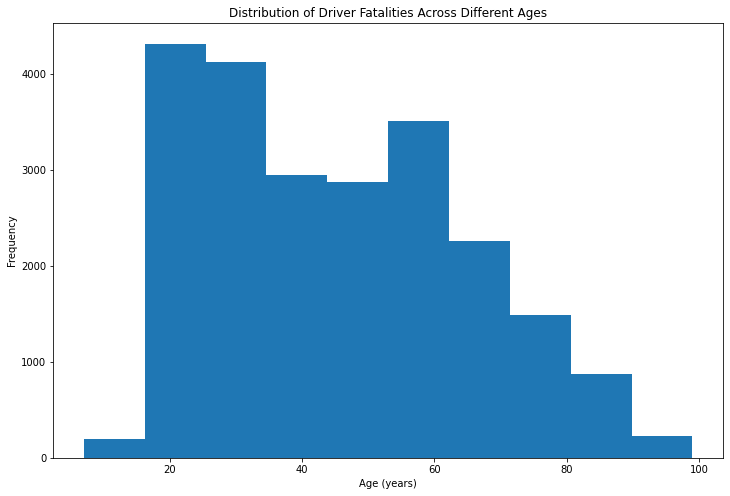

Five Number Summary for Age
 count    22799.000000
mean        45.166542
std         19.511915
min          7.000000
25%         28.000000
50%         43.000000
75%         60.000000
max         99.000000
Name: AGE, dtype: float64


In [99]:
# histogram to visualize distribution of ages in data
person['AGE'].plot.hist(figsize=(12, 8), title="Distribution of Driver Fatalities Across Different Ages").set(xlabel="Age (years)")
plt.show()
print("Five Number Summary for Age\n", person['AGE'].describe())

This data is sightly right skewed. Contextually this makes sense as US census data reflects a simimlar skew to the right caused  that there are more people aged 0-40 than 40-80+
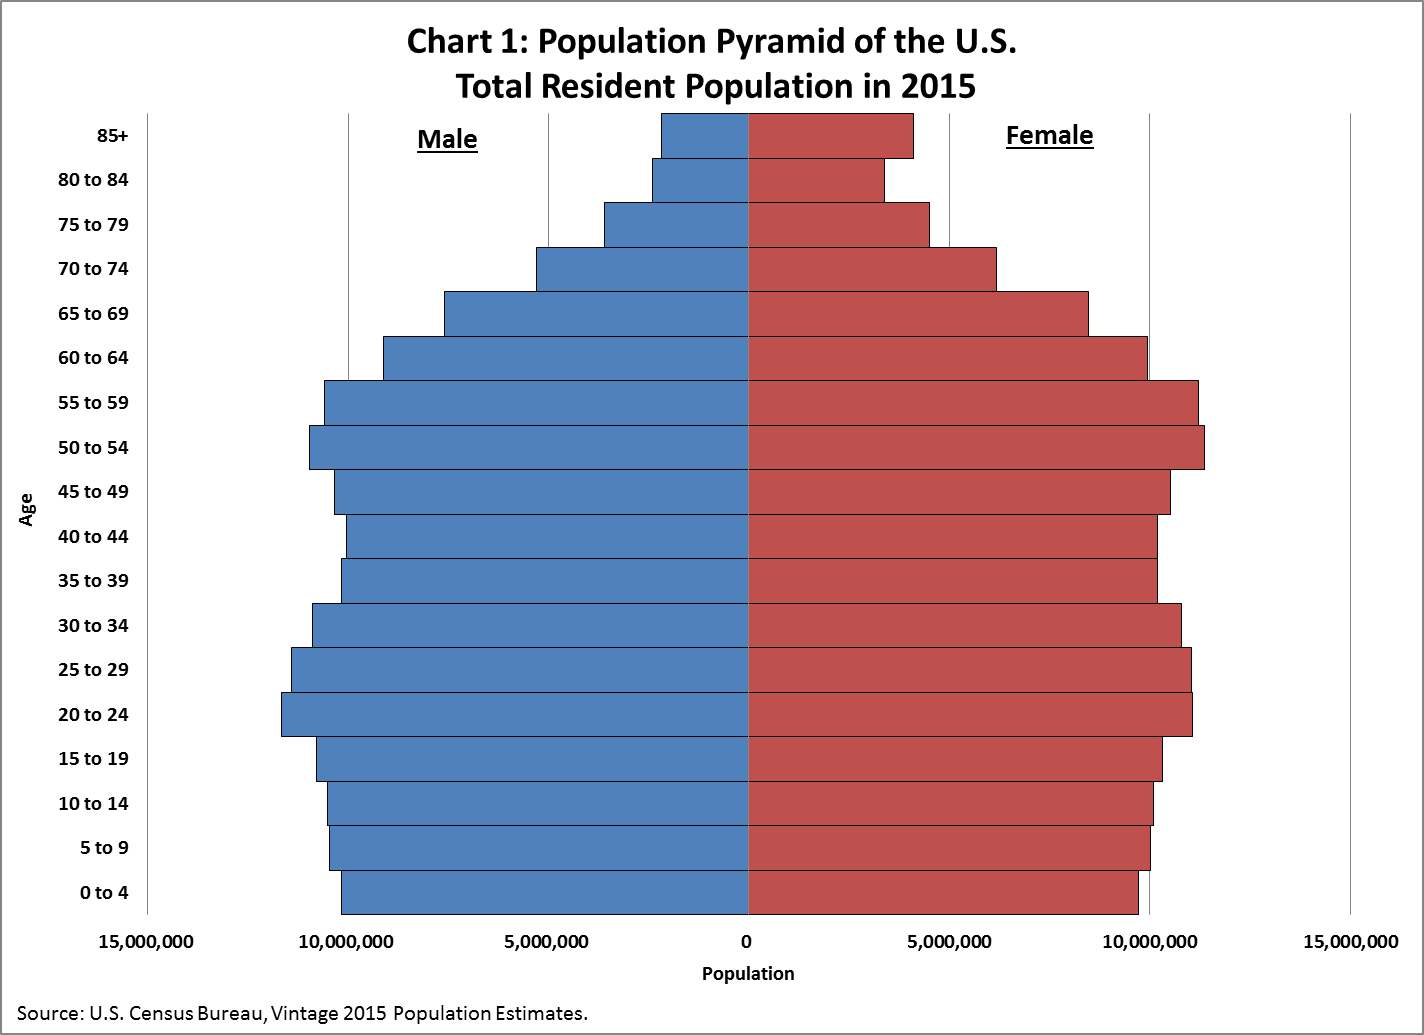

    AGE         AGE_GROUP
0    55   Late Middle Age
1    24    Child-Teenager
3    37  Early Middle Age
7    28   Young Adulthood
18   49  Early Middle Age


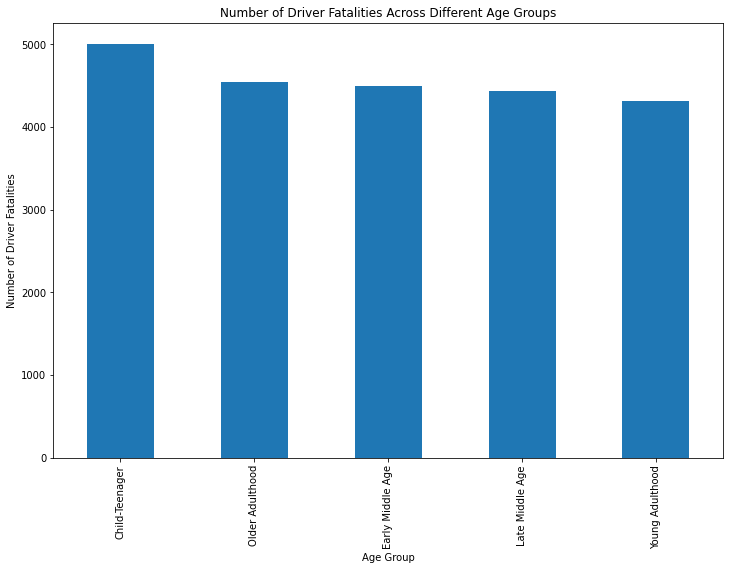

AGE_GROUP
Child-Teenager      5008
Older Adulthood     4547
Early Middle Age    4493
Late Middle Age     4433
Young Adulthood     4318
dtype: int64


In [104]:
age_labels = ['Child-Teenager', 'Young Adulthood', 'Early Middle Age', 'Late Middle Age', 'Older Adulthood']
person['AGE_GROUP'] = pd.qcut(person['AGE'],
                              q=5,
                              labels=age_labels)
print(person[['AGE', 'AGE_GROUP']].head())
# plotting number of fatal accidents per age group 
age_group_accidents = person.groupby('AGE_GROUP').size().sort_values(axis=0, ascending=False)
age_group_accidents.plot.bar(figsize=(12, 8)).set(title="Number of Driver Fatalities Across Different Age Groups", xlabel="Age Group", ylabel="Number of Driver Fatalities")
plt.show()
print(age_group_accidents)



I bin the age data (see below for age group and corresponding age) in order to more easily draw relations. The names of the different age categories were inspired by [ ML Medley · 1980 ](https://pubmed.ncbi.nlm.nih.gov/7203662/)
Once I do that, some interesting statistics is revealed. 

I do know that the FARS dataset which I am using, does not take samples of the data. Which means I am working with all motor vehicle driver fatalities for the year of 2018. This also means that the gross number of deaths across the different driver age groups, is strikingly similar. The child-teenager age group, which is deaths of drivers aged 19.8 years and below has the most gross number of fatalities in that year. 

I am personally astounded by the number of deaths of drivers in the older adulthood age group. These are drivers who are aged 79.2 years of age and above! 

Below was calculated by knowing the min and min age to be 99 and 0 respectively, and dividing 99/5 where 5 is the number of bins. 


**Age group and corresponding ages.**
* *Child-Teenager* : 0 - 19.8 years
* *Older Adulthood* : 19.8 - 39.6 years 
* *Early Middle Age* : 39.6 - 59.4 years
* *Late Middle Age* : 59.4 - 79.2 years
* *Older Adulthood* : 79.2+ years


In [8]:
# renaming 'FUNC_SYSNAME' column label to 'ROAD_TYPE'
person = person.rename(columns={'FUNC_SYSNAME': 'ROAD_TYPE'})

ROAD_TYPE
Principal Arterial - Other    6311
Minor Arterial                5049
Major Collector               3772
Local                         2936
Interstate                    2917
dtype: int64
Percentage of driver fatalities on trafficways that are not in state inventory, 
or are unknown or are not reported: 0.00%


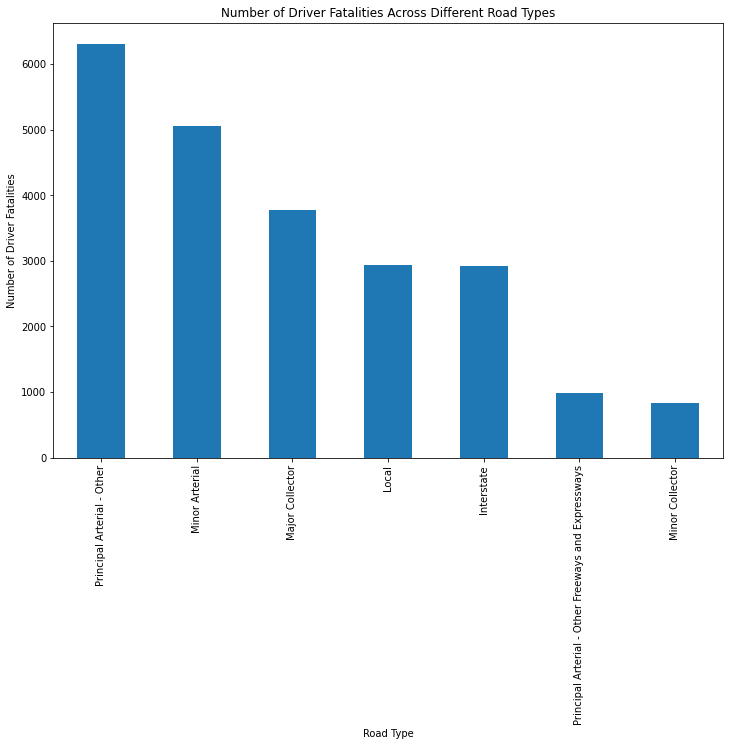

In [105]:
road_types_accidents = person.groupby('ROAD_TYPE').size().sort_values(axis=0, ascending=False)
print(road_types_accidents.head())
not_inventory_known_reported_accidents = person[person['ROAD_TYPE'].eq('Trafficway Not in State Inventory') | person['ROAD_TYPE'].eq('Unknown') | person['ROAD_TYPE'].eq('Not Reported')] 
print("Percentage of driver fatalities on trafficways that are not in state inventory, \nor are unknown or are not reported:", f'{(not_inventory_known_reported_accidents.shape[0] * 100 / person.shape[0]):.2f}%')
road_types_accidents.plot.bar(figsize=(12, 8)).set(title="Number of Driver Fatalities Across Different Road Types",xlabel="Road Type", ylabel="Number of Driver Fatalities" )
plt.show()
# filtering out driver fatalities on trafficways that are not in state inventory,
# or are unknown or are not reported
person = person[person['ROAD_TYPE'].ne('Trafficway Not in State Inventory') & person['ROAD_TYPE'].ne('Unknown') & person['ROAD_TYPE'].ne('Not Reported')] 
road_types_accidents = person.groupby('ROAD_TYPE').size().sort_values(axis=0, ascending=False)


The road type with the most accidents is the principal arterial. According to the [US Department of Transportation](https://safety.fhwa.dot.gov/speedmgt/data_facts/docs/rd_func_class_1_42.pdf) principal arterials connect major cities within a state. Vehicles typically drive at a maximum speed of 50 - 70 mph. Their prevalence and the highspeeds may be a contributing factor to the high number of fatalities

I filter out driver fatalities that occured on roads that are either not in the inventory, are unknown or are not reported, since they make up only ≈ 0.22% of the data

In [10]:
road_types_accidents

ROAD_TYPE
Principal Arterial - Other                             6338
Minor Arterial                                         5075
Major Collector                                        3822
Local                                                  2983
Interstate                                             2926
Principal Arterial - Other Freeways and Expressways     996
Minor Collector                                         841
dtype: int64

In [11]:
# grouping fatal accidents by road type and age group to relate the two
road_type_age_group = person.groupby(["ROAD_TYPE", "AGE_GROUP"]).size().unstack(fill_value=0)
road_type_age_group

AGE_GROUP,Child-Teenager,Young Adulthood,Early Middle Age,Late Middle Age,Older Adulthood
ROAD_TYPE,,,,,
Interstate,610,585,658,631,442
Local,750,594,595,554,490
Major Collector,845,664,778,775,760
Minor Arterial,1132,917,976,972,1078
Minor Collector,196,169,161,174,141
Principal Arterial - Other,1302,1184,1187,1185,1480
Principal Arterial - Other Freeways and Expressways,217,241,176,180,182


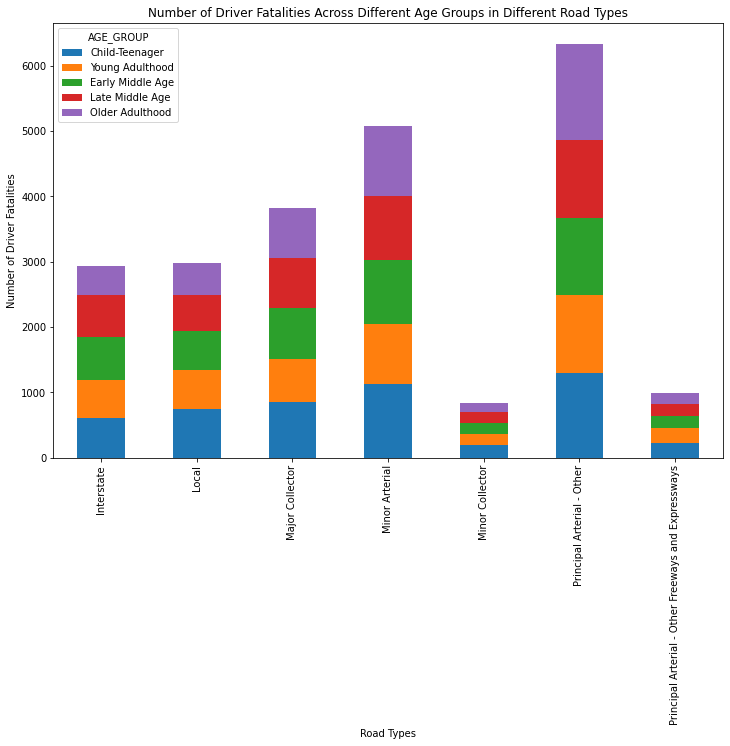

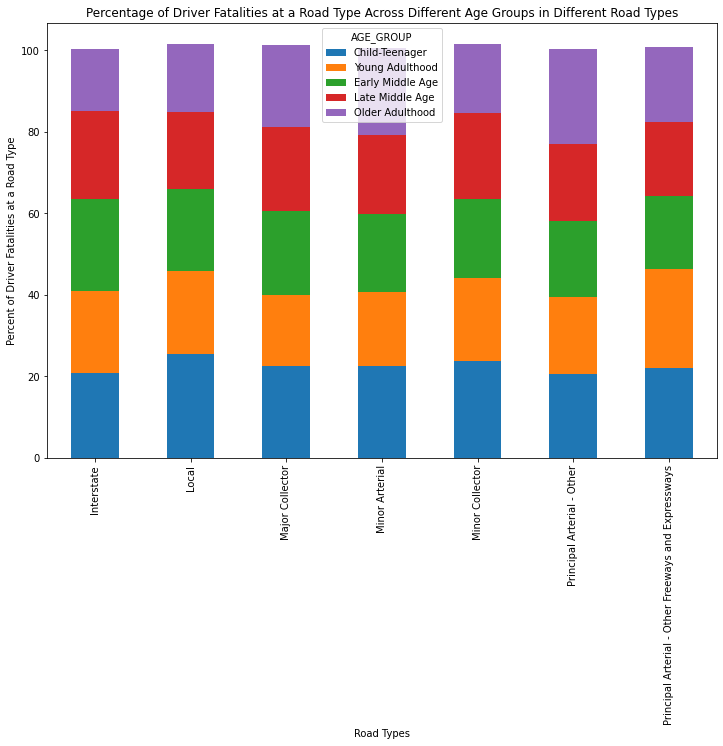

In [110]:
road_type_age_group.plot(kind='bar', stacked=True, figsize=(12, 8)).set(title="Number of Driver Fatalities Across Different Age Groups in Different Road Types", xlabel="Road Types", ylabel="Number of Driver Fatalities")
plt.show()
road_type_age_group_percent = road_type_age_group.div(road_types_accidents, axis = 0).mul(100) 
road_type_age_group_percent.plot(kind='bar', stacked=True, figsize=(12, 8)).set(title="Percentage of Driver Fatalities at a Road Type Across Different Age Groups in Different Road Types", xlabel="Road Types", ylabel="Percent of Driver Fatalities at a Road Type")
plt.show()

This shows that in both minor and principal arterials which consist of freeways and expressways, older people are more likely to be involved in an accident. 

In [42]:
# Krustal statistic
# testing with absolute driver fatalaties on different roads
stat, p_value = stats.kruskal(*[road_type_age_group.iloc[i] for i in range(road_type_age_group.shape[0])])
print(f'Kruskal statistic: {stat}, p-value: {p_value}')
print(f'Given p-value: {p_value} is less than 0.05, we reject the null hypothesis \nthat the population median of all of the groups are equal')

# testing with relative percentage driver fatalities 
stat, p_value = stats.kruskal(*[road_type_age_group_percent.iloc[i] for i in range(road_type_age_group_percent.shape[0])])
print(f'\n\nKruskal statistic: {stat}, p-value: {p_value}')
print(f'Given p-value: {p_value} is much greater than 0.05, we accept the null hypothesis \nthat the population median of all of the groups are equal')

Kruskal statistic: 32.3504761904762, p-value: 1.3977472272518844e-05
Given p-value: 1.3977472272518844e-05 is less than 0.05, we reject the null hypothesis 
that the population median of all of the groups are equal


Kruskal statistic: 0.6171428571428663, p-value: 0.9961077889004778
Given p-value: 0.9961077889004778 is much greater than 0.05, we accept the null hypothesis 
that the population median of all of the groups are equal


Kruskal tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. See [Kruskal SciPy docs](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html)

I first test whether the total number of deaths of those in differing age groups in different roads is significantly different. This showed to be true with kruskal. This also makes sense because, for example, the fatalities on the Minor Collector seen in the first graph above has a much lower median than fatalities on the other roads. 

I then test to see if the relative deaths, that is, the percentage of fatalities across different age groups in different roads (second graph) is different. Kruskal shows that there is no statistical difference. This means that relative deaths across the different ages on different roads remains the same.

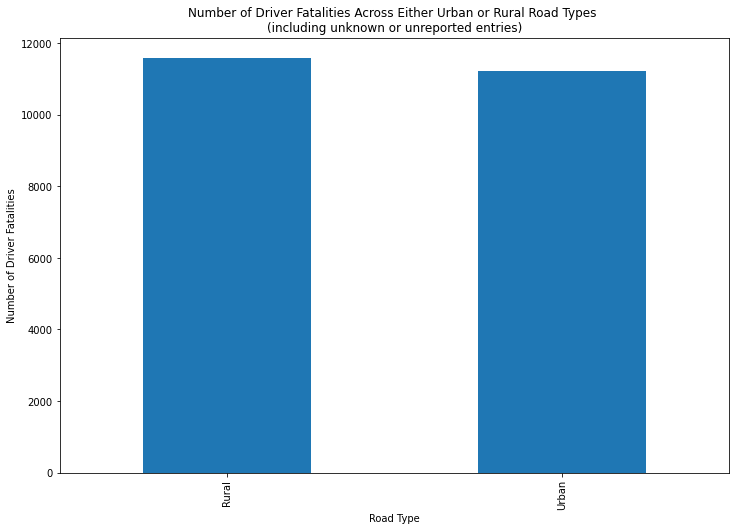

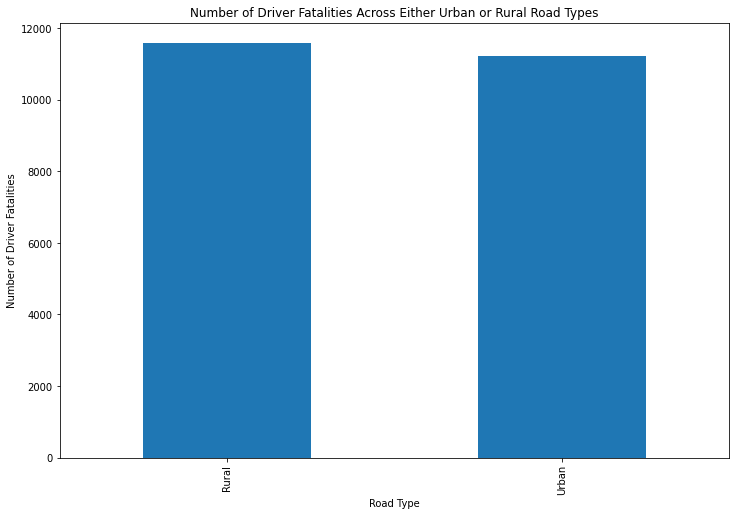

RUR_URBNAME
Rural    11581
Urban    11218
dtype: int64

In [111]:
rural_urban_accidents = person.groupby('RUR_URBNAME').size().sort_values(axis=0, ascending=False)
rural_urban_accidents.plot.bar(figsize=(12, 8)).set(title="Number of Driver Fatalities Across Either Urban or Rural Road Types \n(including unknown or unreported entries)", xlabel="Road Type", ylabel="Number of Driver Fatalities")
plt.show()

# filtering out accidents that did not occur in either an rural or urban road
person =  person[(person['RUR_URBNAME'].eq('Rural')) | (person['RUR_URBNAME'].eq('Urban'))]
rural_urban_accidents = person.groupby('RUR_URBNAME').size().sort_values(axis=0, ascending=False)
rural_urban_accidents.plot.bar(figsize=(12, 8)).set(title="Number of Driver Fatalities Across Either Urban or Rural Road Types", xlabel="Road Type", ylabel="Number of Driver Fatalities")
plt.show()
rural_urban_accidents

According to [University of California](https://ucanr.edu/sites/forestry/Webinars/Rural_Roads_Webinar_Series/#:~:text=Rural%20roads%20are%20defined%20as,recreational%20and%20resource%20management%20uses.&text=They%20may%20be%20%E2%80%9Clegacy%E2%80%9D%20roads,trails%20or%20historic%20logging%20roads.)
rural roads are defined as low traffic volume roads located in forested and rangeland settings that serve residential use. On the other hand, according to [OECD](https://stats.oecd.org/glossary/detail.asp?ID=4009) urban roads are roads within the boundaries of a built-up area, which is an area with entries and exits specially sign-posted as such.

This shows that there are more driver fatalities, 449, on rural roads than on urban roads. Given that there are so few driver fatalities not on either a rural or urban road, such as in trafficways that are not on the state inventory, I filter them out. 



In [25]:
urban_rural_age_group = person.groupby(["RUR_URBNAME", "AGE_GROUP"]).size().unstack(fill_value=0)
urban_rural_age_group

AGE_GROUP,Child-Teenager,Young Adulthood,Early Middle Age,Late Middle Age,Older Adulthood
RUR_URBNAME,,,,,
Rural,2459,2057,2339,2450,2404
Urban,2590,2295,2190,2019,2168


[Text(0, 0.5, 'Percentage of Driver Fatalities at a Road Type'),
 Text(0.5, 0, 'Road Type'),
 Text(0.5, 1.0, 'Percentage of Driver Fatalities at a Road Type Across Different Age Groups in Either Urban or Rural Road Types')]

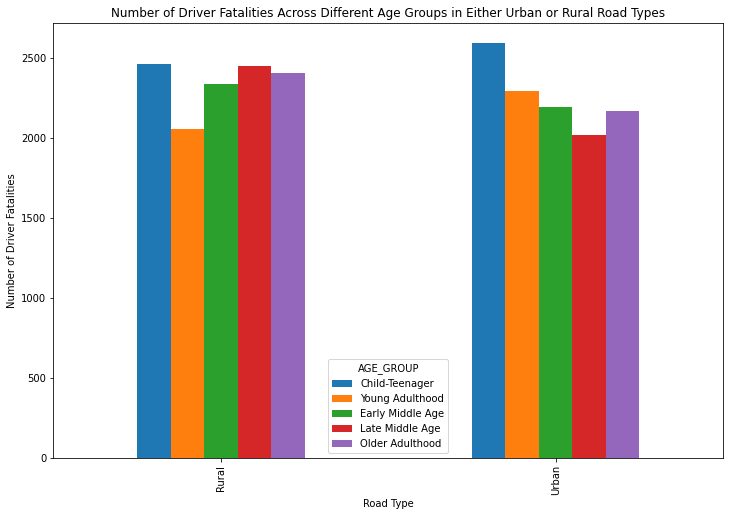

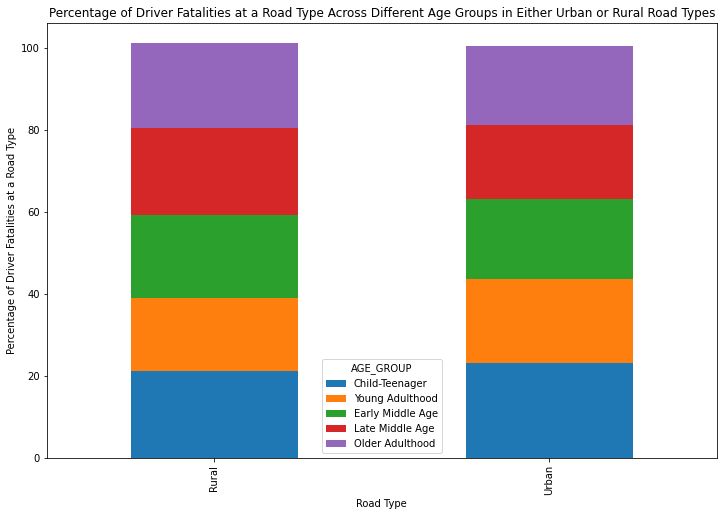

In [112]:
urban_rural_age_group.plot.bar(figsize=(12,8)).set(title="Number of Driver Fatalities Across Different Age Groups in Either Urban or Rural Road Types", xlabel="Road Type", ylabel="Number of Driver Fatalities")
urban_rural_age_group_percent = urban_rural_age_group.div(rural_urban_accidents, axis=0).mul(100)
urban_rural_age_group_percent.plot(kind='bar', stacked=True, figsize=(12, 8)).set(title="Percentage of Driver Fatalities at a Road Type Across Different Age Groups in Either Urban or Rural Road Types", xlabel="Road Type", ylabel="Percentage of Driver Fatalities at a Road Type")

There does not appear to be a significant difference in mean between the different age groups in either rural roads or urban roads. Since rural or urban roads encompass all other kinds of roads such as arterials and collectors, using it does not summarize anything special about age. That is, driving on an arterial in a rural town appears to be the same experience driving in an arterial in an urban town. 

In [64]:
# Krustal statistic
# testing with absolute driver fatalaties on urban or rural roads
stat, p_value = stats.kruskal(*[urban_rural_age_group.iloc[i] for i in range(urban_rural_age_group.shape[0])])
print(f'Kruskal statistic: {stat}, p-value: {p_value}')
print(f'Given p-value: {p_value} is much greater than 0.05, we accept the null hypothesis \nthat the population median of all of the groups are equal')
# testing with relative percentage driver fatalities 
stat, p_value = stats.kruskal(*[urban_rural_age_group_percent.iloc[i] for i in range(urban_rural_age_group_percent.shape[0])])
print(f'\n\nKruskal statistic: {stat}, p-value: {p_value}')
print(f'Given p-value: {p_value} is much greater than 0.05, we accept the null hypothesis \nthat the population median of all of the groups are equal')

Kruskal statistic: 0.8836363636363629, p-value: 0.34720763934942456
Given p-value: 0.34720763934942456 is much greater than 0.05, we accept the null hypothesis 
that the population median of all of the groups are equal


Kruskal statistic: 0.2727272727272734, p-value: 0.6015081344405895
Given p-value: 0.6015081344405895 is much greater than 0.05, we accept the null hypothesis 
that the population median of all of the groups are equal


I first run Kruskal statistical test for total number of fatalities across different age groups in either rural or urban roads. 

I then run Kruskal statistical test on relative number of fatalities across different age groups in both rural or urban roads (second graph). 
In both cases Kruskal statistical test confirms our hypothesis that there is no statitistical difference. Which means that the distribution of fatalities across different age groups in either rural or urban roads is the same


In [69]:
Northeast = ['Maine', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New Hampshire', 'Vermont', 'New York', 'Pennsylvania', 'New Jersey', 'Delaware', 'Maryland']
Southeast = ['West Virginia', 'Virginia', 'Kentucky','Tennessee', 'North Carolina', 'South Carolina', 'Georgia', 'Alabama', 'Mississippi', 'Arkansas', 'Louisiana', 'Florida', 'District of Columbia']
Midwest = ['Ohio', 'Indiana', 'Michigan', 'Illinois', 'Missouri', 'Wisconsin', 'Minnesota', 'Iowa', 'Kansas', 'Nebraska', 'South Dakota', 'North Dakota']
Southwest = ['Texas', 'Oklahoma', 'New Mexico', 'Arizona']
West = ['Colorado', 'Wyoming', 'Montana', 'Idaho', 'Washington', 'Oregon', 'Utah', 'Nevada', 'California', 'Alaska', 'Hawaii']

#Creating dicts from lists 
Northeast = {x:'Northeast' for x in Northeast}
Southeast = {x: 'Southeast' for x in Southeast}
Midwest = {x: 'Midwest' for x in Midwest}
Southwest = {x: 'Southwest' for x in Southwest}
West = {x: 'West' for x in West}

# combining to one dictionary
states_to_regions = {**Northeast, **Southeast, **Midwest ,**Southwest, **West}

# adding column of regions
person['REGIONS'] = person['STATENAME'].map(states_to_regions)
print("Null values:", person['REGIONS'].isna().sum())
person['REGIONS'].head()


Null values: 0


0     Southeast
1     Southeast
3     Southeast
7     Southeast
18    Southeast
Name: REGIONS, dtype: object

In order for the analysis to not be too cumbersome, I group states into regions as given by [National Geographic](https://www.nationalgeographic.org/maps/united-states-regions/#:~:text=A%20common%20way%20of%20referring,West%2C%20Southeast%2C%20and%20Midwest.). The original data included 'The District of Columbia' as a separate state. For this reason, I added it into the Southeast region when mapping to regions. Below is a map showing the regions:

 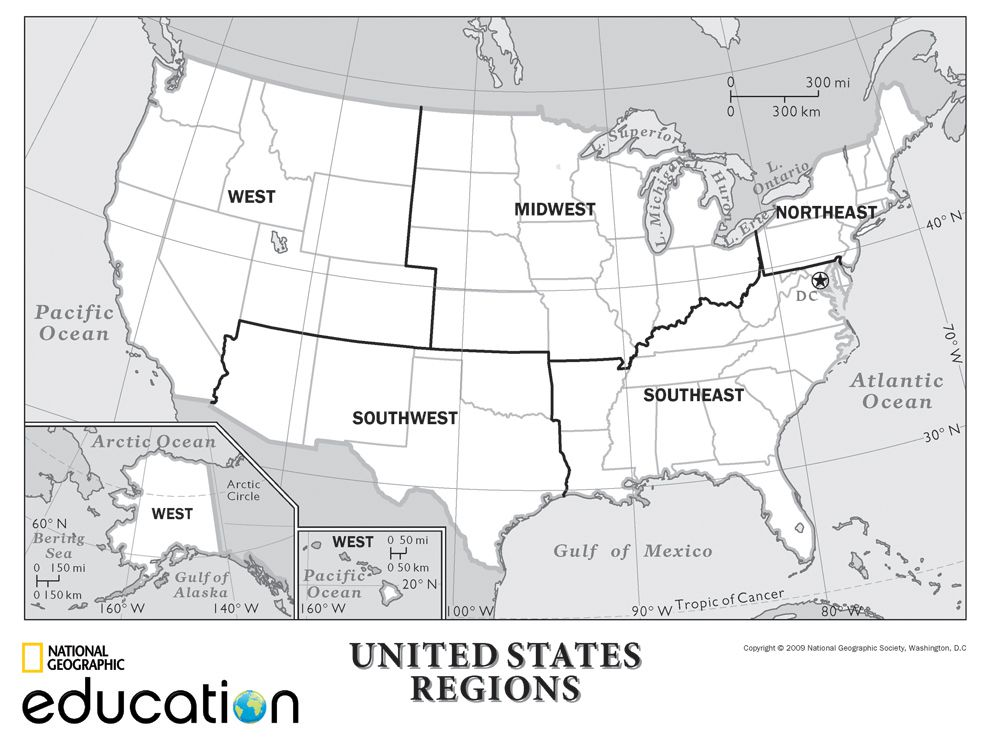

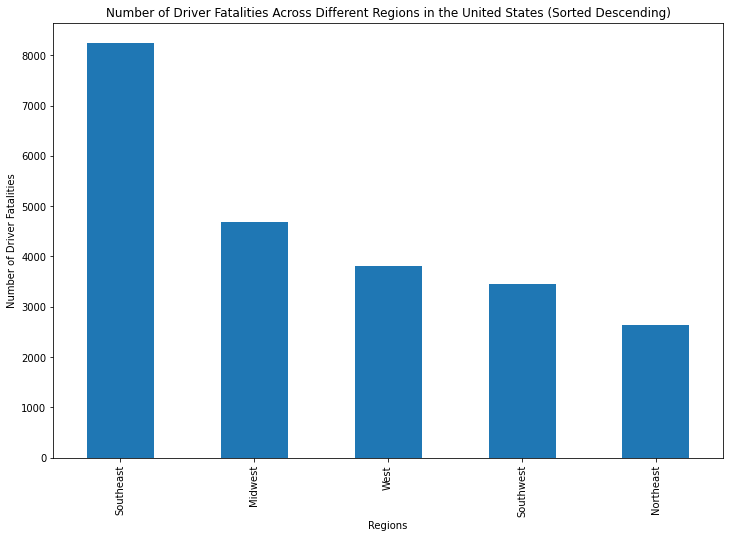

REGIONS
Southeast    8238
Midwest      4679
West         3802
Southwest    3452
Northeast    2628
dtype: int64

In [114]:
regions_accidents = person.groupby('REGIONS').size().sort_values(axis=0, ascending=False)

regions_accidents.plot.bar(figsize=(12, 8)).set(title="Number of Driver Fatalities Across Different Regions in the United States (Sorted Descending)", xlabel ="Regions", ylabel="Number of Driver Fatalities")
plt.show()
regions_accidents

The region with by far the most fatal accidents is the Southeast. Perhaps this is linked to the fact that it has the most number of states. 

In [71]:
# grouping fatal accidents by region and age group to relate the two
regions_age_group = person.groupby(["REGIONS", "AGE_GROUP"]).size().unstack(fill_value=0)
regions_age_group

AGE_GROUP,Child-Teenager,Young Adulthood,Early Middle Age,Late Middle Age,Older Adulthood
REGIONS,,,,,
Midwest,1011,820,956,969,979
Northeast,552,491,490,516,582
Southeast,1777,1543,1635,1648,1677
Southwest,804,708,682,631,642
West,905,790,766,705,692


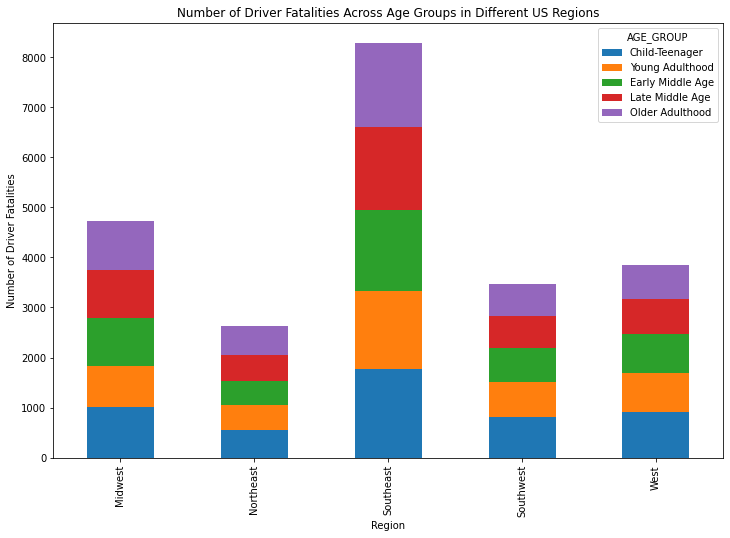

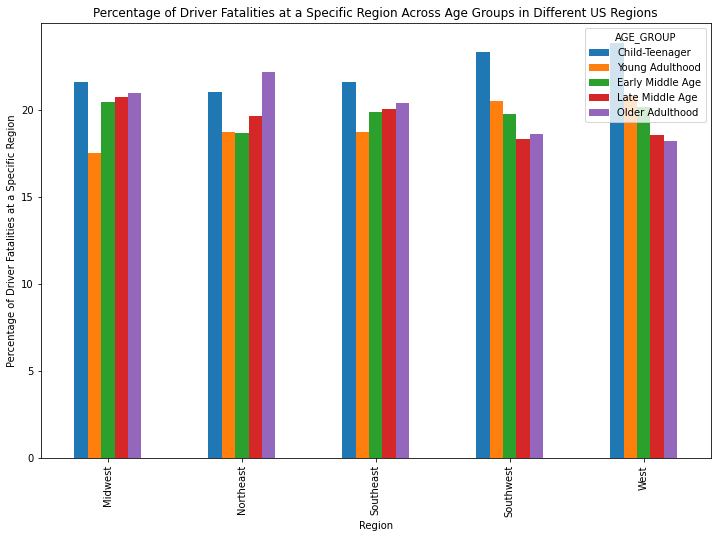

In [115]:
regions_age_group.plot(kind='bar', stacked=True, figsize=(12, 8)).set(title="Number of Driver Fatalities Across Age Groups in Different US Regions", xlabel="Region", ylabel="Number of Driver Fatalities")
plt.show()
regions_age_group_percent = regions_age_group.div(regions_accidents, axis = 0).mul(100) 
regions_age_group_percent.plot.bar(figsize=(12, 8)).set(title="Percentage of Driver Fatalities at a Specific Region Across Age Groups in Different US Regions", xlabel="Region", ylabel="Percentage of Driver Fatalities at a Specific Region")
plt.show()

In the first graph we see that the regions have widely different total number of fatalities. 

Indeed, motor vehicle drivers in the child-teenager age group have the highest number of fatal accidents in the entire dataset as was shown early on. This may explain in part why the child-teenager age group leads in relative percentage of driver fatalities across all the different regions save for the Northeast (second graph). 

Though maybe just a coincidence, the relative order of relative percentage of deaths across the different driver age groups in the West region from highest to lowest, is also the order of age groups from youngest to oldest. 

The West region also boasts very high proprtion of of fatalities who were drivers in the child-teenager age group. 

Also worthy to note is the older adulthood age group in the Northeast region, which leads as recording highest proportion of driver fatalities. And in fact, in two other regions, older adulthood comes second in percentage of fatalities across different age groups.

In [77]:
# Krustal statistic
# testing with absolute driver fatalaties in different US regions
stat, p_value = stats.kruskal(*[regions_age_group.iloc[i] for i in range(regions_age_group.shape[0])])
print(f'Kruskal statistic: {stat}, p-value: {p_value}')
print(f'Given p-value: {p_value} is less than 0.05, we reject the null hypothesis \nthat the population median of all of the groups are equal')
# testing with relative percentage driver fatalities 
stat, p_value = stats.kruskal(*[regions_age_group_percent.iloc[i] for i in range(regions_age_group_percent.shape[0])])
print(f'\n\nKruskal statistic: {stat}, p-value: {p_value}')
print(f'Given p-value: {p_value} is much greater than 0.05, we accept the null hypothesis \nthat the population median of all of the groups are equal')

Kruskal statistic: 22.01353846153846, p-value: 0.00019918059395516985
Given p-value: 0.00019918059395516985 is less than 0.05, we reject the null hypothesis 
that the population median of all of the groups are equal


Kruskal statistic: 0.45784615384616245, p-value: 0.97747277588147
Given p-value: 0.97747277588147 is much greater than 0.05, we accept the null hypothesis 
that the population median of all of the groups are equal


I first conducted Kruskal test on the total number of fatalities across different age groups in the different US regions. The test shows that the population medians of the groups are not equal. This makes sense because, for example, the population median of the Northeast region is much lower than all the rest. 

From the second test of relative fatalities across different age groups in different regions, we see that although the West seemingly has much higher variance in deaths, it's population median is seen to be the same as the relative fatalities in other regions. 


### Age and time of day

In [78]:
hour_accident = person.groupby('HOUR').size().sort_index(axis=0, ascending=True)

print(hour_accident)
print("percent of accidents whose time was not recorded:", f'{(hour_accident[99]*100/hour_accident.sum()):.2f}%')

#drop fatal accidents whose time is not reported
person = person[person['HOUR'].ne(99)]
hour_accident = person.groupby('HOUR').size().sort_index(axis=0, ascending=True)

HOUR
0      802
1      829
2      829
3      544
4      524
5      727
6      885
7      870
8      759
9      709
10     794
11     937
12    1012
13    1089
14    1236
15    1283
16    1293
17    1297
18    1230
19    1104
20    1101
21    1049
22     964
23     932
99     172
dtype: int64
percent of accidents whose time was not recorded: 0.75%


'99' means the hour of the accident was not recorded for a particular fatal accident. Given that it constitutes 0.76 of the data, I drop it. 

count      24.000000
mean      949.958333
std       225.163222
min       524.000000
25%       800.000000
50%       934.500000
75%      1101.750000
max      1297.000000
dtype: float64


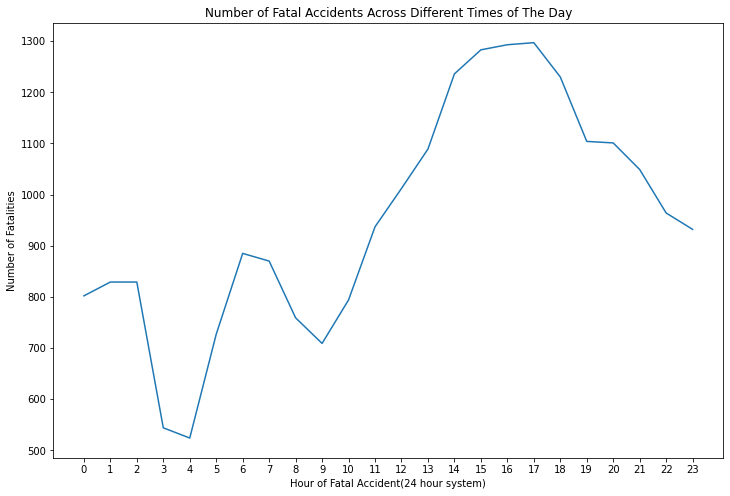

Hour with most related fatalities: 17 
Hour with least related fatalities: 4


In [121]:
print(hour_accident.describe())
# xticks allow for the x axis to be marked every hour for easier interpretation
hour_accident.plot.line(figsize=(12, 8), xticks=np.arange(0, 24, 1)).set(title="Number of Fatal Accidents Across Different Times of The Day", xlabel="Hour of Fatal Accident(24 hour system)", ylabel="Number of Fatalities")
plt.show()
print("Hour with most related fatalities:", hour_accident.argmax(), "\nHour with least related fatalities:", hour_accident.argmin())

We can notice that at 5pm (1700 hours), there is a peak of total number of fatalities. 

What is of particular interest is that there are certain windows of the day that reveal a linear correlation between total number of fatalities and time of day. For example, between 4am to 7am there is a steady increase of fatal accidents. Perhaps this is correlated with early risers getting out of the house. According to [CDL.com](https://www.cdl.com/cdl-faq/trucking-lifestyle/what-is-a-typical-truck-driver-s-schedule#:~:text=However%2C%20a%20typical%20truck%20driver,or%20fill%20out%20driving%20logs.) Truck drivers are on the road starting from 4am to 6am.

Furthermore, from 9am to 5pm there is a steady, linear increase of number of deaths. This may be attritubuted to all the other drivers getting out on the road. 9am to 5pm is according to [Wikipedia](https://en.wikipedia.org/wiki/9_to_5_(disambiguation)) the standard working hours for the working class, who according to the [Bureau of Transportation Statistics](https://www.bts.gov/archive/publications/highlights_of_the_2001_national_household_travel_survey/section_01) are more likely to own a car than the poor population. 


In [80]:
# grouping fatal accidents by hour and age group to relate the two
hour_age_group = person.groupby(["HOUR", "AGE_GROUP"]).size().unstack(fill_value=0)
hour_age_group

AGE_GROUP,Child-Teenager,Young Adulthood,Early Middle Age,Late Middle Age,Older Adulthood
HOUR,,,,,
0,232,216,193,121,40
1,300,215,191,91,32
2,297,256,151,93,32
3,189,162,109,62,22
4,166,137,115,65,41
5,168,171,161,143,84
6,218,199,181,168,119
7,219,166,174,152,159
8,169,119,142,138,191


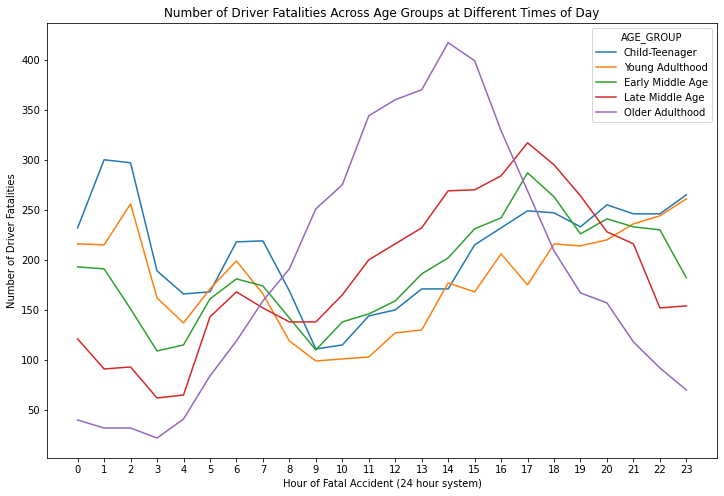

Descriptive statistics for each age group
For Child-Teenager: maximum is 300 driver fatalaties at 100 hours
For Young Adulthood: maximum is 261 driver fatalaties at 2300 hours
For Early Middle Age: maximum is 287 driver fatalaties at 1700 hours
For Late Middle Age: maximum is 317 driver fatalaties at 1700 hours
For Older Adulthood: maximum is 417 driver fatalaties at 1400 hours


In [122]:
hour_age_group.plot.line(figsize=(12,8), xticks=np.arange(0, 24, 1)).set(title="Number of Driver Fatalities Across Age Groups at Different Times of Day", xlabel="Hour of Fatal Accident (24 hour system)", ylabel="Number of Driver Fatalities")
plt.show()

hour_age_group_columns = hour_age_group.columns
print("Descriptive statistics for each age group")
for i in range(hour_age_group.shape[1]): 
  temp_age_accidents = hour_age_group.iloc[:, i]
  print(f"For {hour_age_group_columns[i]}: maximum is {temp_age_accidents.max()} driver fatalaties at {temp_age_accidents.argmax()}00 hours")

All the different motor vehicle driver fatalities across the different age-groups seem to be monotonically correlated, some more strongly than others, to the time of the day. However, most of the fatalities seem to be only correlated to the hour of the day, in particular windows of the day. 

It should be noted that the number of fatalities at a particular hour of the day seems to vary widely across different age groups. The peak of number of fatalities in a single hour appears to be drivers aged 79.2 years an above at 2pm with 417 accident related deaths. 

With particular notice, the number of fatalities of drivers in the older adulthood age group aged 79.2 and above, seems to be most strongly correlated to the time of day. In particular there seems to be a strong positive monotonic correlation of number of deaths between strongly monotonically correlated to the hour from 3am to 2pm. And strongly negatively correlated from 2pm to 11pm. 
With particular notice, the number of fatalities of drivers in the older adulthood age group  aged 79.2 and above, seems to be most strongly affected by the time of day. In particular there seems to be a strong positive monotonic correlation of number of deaths between the hours 3am to 2pm. And strongly negatively correlated from 2pm to 11pm. 

In [92]:
time_of_day = np.arange(24)


for i in range(hour_age_group.shape[1]): 
  temp_age_accidents = hour_age_group.iloc[:, i]
  stat, p_value = stats.kruskal(time_of_day, temp_age_accidents)
  print(f'Pearson\'s R coefficient: {stat}, p-value: {p_value}')
  if p_value < 0.05: 
    print(f'Given p-value: {p_value} is less than 0.05, we reject the null hypothesis \nthat number of fatalities of drivers in {hour_age_group_columns[i]} age group \nis not linearly correlated to hour of day\n\n')
  else: 
    print(f'Given p-value: {p_value} is greater than 0.05 we accept the null hypothesis \nthat number of fatalities of drivers in {hour_age_group_columns[i]} age group \nis linearly correlated to hour of day\n\n')


Pearson's R coefficient: 35.271049345855275, p-value: 2.8686478098246476e-09
Given p-value: 2.8686478098246476e-09 is less than 0.05, we reject the null hypothesis 
that number of fatalities of drivers in Child-Teenager age group 
is not linearly correlated to hour of day


Pearson's R coefficient: 35.26722032242306, p-value: 2.8742933491505275e-09
Given p-value: 2.8742933491505275e-09 is less than 0.05, we reject the null hypothesis 
that number of fatalities of drivers in Young Adulthood age group 
is not linearly correlated to hour of day


Pearson's R coefficient: 35.265306122448976, p-value: 2.87711982910398e-09
Given p-value: 2.87711982910398e-09 is less than 0.05, we reject the null hypothesis 
that number of fatalities of drivers in Early Middle Age age group 
is not linearly correlated to hour of day


Pearson's R coefficient: 35.271049345855275, p-value: 2.8686478098246476e-09
Given p-value: 2.8686478098246476e-09 is less than 0.05, we reject the null hypothesis 
that number 

I run Pearson's R correlation test to determine if the number of driver fatalities across the different age groups is correlated to the hour of the day the fatal accident occured. This showed a strong positive monotonic linear correlation, each with large Pearson's R coefficient values, with the hour the fatal accident occured. Thereby confirming what I saw in the line plots. 

### What we learn

**For the first question:**

Does age affect where a driver in a motor vehicle is involved in a fatal accident?

We learn that the number of driver fatalities across age groups is statistically different in different road types. However, we also learn that when looking at relative fatalities (percentage of fatalities) across different age groups there is no statistical difference in different road types. This means that the proportion of those who died across different age groups is similar regardless of the road type. 

Furthermore, we learn when looking at rural or urban roads, both the total number and relative percentage of fatalities across different age groups is not statitically different in rural or urban roads. This means that both the total number and proportion of driver fatalities across age groups is the same regardless of whether it is a rural road or an urban road. 

A similar result was found for regions, which showed that there is no statistical difference of number and relative driver fatalities across different age groups in different geographical regions. 

**For the second question:**

Does age affect the time of day an accident occurs?

We learnt that there is indeed a correlation between the number of fatalities across different age groups and the time an accident occurs. Furthermore, we notice that there is seemingly a strong positive correlation of number of fatalities vs hour of day for older adults people during the hours 3am to 2pm and a strong negative correlation from the hours 2pm to 11pm. The peak number of fatalities in a certain hour is 417 deaths at 2pm for aged people. The fact that it occurs at 2pm, might be more of a matter of work schedule rather than lighting conditions and observability since this is the afternoon. 


### Ethical Concerns
It is always a concern when studies show correlations between demographic data and something happening. This is because to the public and stakeholders involved, a causaility relationship may sometimes be unwillingly implied. This can lead to discrimination against implicated social groups.

Certain stakeholders might be particularly interested in the results of such a result, for example, car owners. Based on the result of motor vehicle driver fatalities across different age groups in different road types, car owners might decide to use certain roads less frequently because of the risk it poses to them, especially since the results of this study would be specific to their age category. This can then have a ripple effect, one of which could be increased traffic congestation on smaller roads and increased cases of overspeeding on larger arterial roads, if for example the results show that arterial roads are more dangerous. 

Car dealers might also sell cars that are more suitable for certain road types. For example, cars that are more suited for driving on local bumpy roads might be sold more if more people become sensitive to driving on dangerous arterial roads. Policy makers might also be impacted and might decide, for example, to limiit speeds on certain roads at certain times of the day, given the results that certain times of the day are more dangerous. 

This might then inhibit mobility as people cannot go as fast to their workplaces or homes. Lastly, policy makers might make policies targeted for individuals of certain ages, such as limited mobility for people over certain years. In fact, in some states it is required for people who are over a certain number of years of age to get tested more frequently. This might impact the number of older adults on the road not to mention the impact on their sense of independence as they might have to rely on other people to drive them. 